In [1]:
# Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# OS access
import os

# Custom module
import util

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
def get_quartet_data():

    '''
    Checks if the csv file for demonstrating Anscombe's Quartet is stored locally.  If it's not then
    it acquires the data from a url then saves it as a dataframe. 
    '''

    file = 'quartet.csv'
    
    if os.path.isfile(file):
        return pd.read_csv(file)
    
    else:
        url = "https://gist.githubusercontent.com/ryanorsinger/6218f5731f3df7cb4771ff3879fdeaa3/raw/88cb6bed276e2236c33df011bd753b6c73832c30/quartet.csv"
        
        df = pd.read_csv(url)

        df.to_csv(file)

        return df 

In [3]:
df = get_quartet_data()
df.head(3)

,Unnamed: 0,id,dataset,x,y
0,0,0,I,10.0,8.04
1,1,1,I,8.0,6.95
2,2,2,I,13.0,7.58


Unnamed: 0                                                  id        \
             count  mean       std   min   25%   50%   75%   max count  mean   
dataset                                                                        
I             11.0   5.0  3.316625   0.0   2.5   5.0   7.5  10.0  11.0   5.0   
II            11.0  16.0  3.316625  11.0  13.5  16.0  18.5  21.0  11.0  16.0   
III           11.0  27.0  3.316625  22.0  24.5  27.0  29.5  32.0  11.0  27.0   
IV            11.0  38.0  3.316625  33.0  35.5  38.0  40.5  43.0  11.0  38.0   

                                                    x                      \
              std   min   25%   50%   75%   max count mean       std  min   
dataset                                                                     
I        3.316625   0.0   2.5   5.0   7.5  10.0  11.0  9.0  3.316625  4.0   
II       3.316625  11.0  13.5  16.0  18.5  21.0  11.0  9.0  3.316625  4.0   
III      3.316625  22.0  24.5  27.0  29.5  32.0  11.0  9.0  3.316625  4.0   
IV       3.316625  33.0  35.5  38.0  40.5  43.0  11.0  9.0  3.316625  8.0   

                                  y                                         \
         25%  50%   75%   max count      mean       std   min    25%   50%   
dataset                                                                      
I        6.5  9.0  11.5  14.0  11.0  7.500909  2.031568  4.26  6.315  7.58   
II       6.5  9.0  11.5  14.0  11.0  7.500909  2.031657  3.10  6.695  8.14   
III      6.5  9.0  11.5  14.0  11.0  7.500000  2.030424  5.39  6.250  7.11   
IV       8.0  8.0   8.0  19.0  11.0  7.500909  2.030579  5.25  6.170  7.04   

                      
          75%    max  
dataset               
I        8.57  10.84  
II       8.95   9.26  
III      7.98  12.74  
IV       8.19  12.50

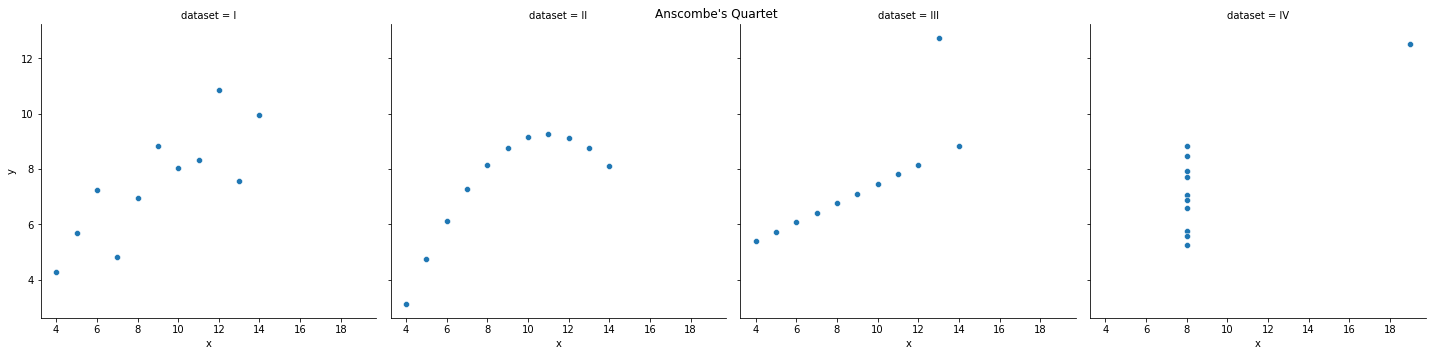

In [4]:
%matplotlib inline

sns.relplot(x='x', y='y', col='dataset', data=df).fig.suptitle("Anscombe's Quartet")
df.groupby("dataset").describe()

1. Using lemonade.csv dataset and focusing on continuous variables:
- Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense? Which outliers should be kept?
- Use the IQR Range Rule and the upper and upper bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these upper outliers make sense? Which outliers should be kept?
- Using the multiplier of 3, IQR Range Rule, and the lower bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense? Which outliers should be kept?
- Using the multiplier of 3, IQR Range Rule, and the upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?

In [5]:
def get_lower_and_upper_bounds(series, multiplier = 1.5):
    '''
    Gets the upper and lower bounds of a series based on the InterQuartile Range and a multiplier. Default multiplier is 1.5
    '''
    q1, q3 = series.quantile([.25, .75])
    iqr = q3 - q1
    
    upper = q3 + (multiplier * iqr)
    lower = q1 - (multiplier * iqr)
    
    print(f'{series.name}\'s Upper bound is {round(upper, 1)}, and Lower bound is {round(lower, 1)}')
    return upper, lower

In [6]:
csv = "/Users/ultimate/codeup-data-science/anomaly-detection-exercises/lemonade.csv"

if os.path.isfile(csv):
        pd.read_csv(csv)
    
else:
    url = "https://gist.githubusercontent.com/ryanorsinger/19bc7eccd6279661bd13307026628ace/raw/e4b5d6787015a4782f96cad6d1d62a8bdbac54c7/lemonade.csv"

    df = pd.read_csv(url)

    df.to_csv(file)

df = pd.read_csv(csv)
df.head(3)

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15


In [7]:
df.dtypes

Date            object
Day             object
Temperature    float64
Rainfall       float64
Flyers           int64
Price          float64
Sales            int64
dtype: object

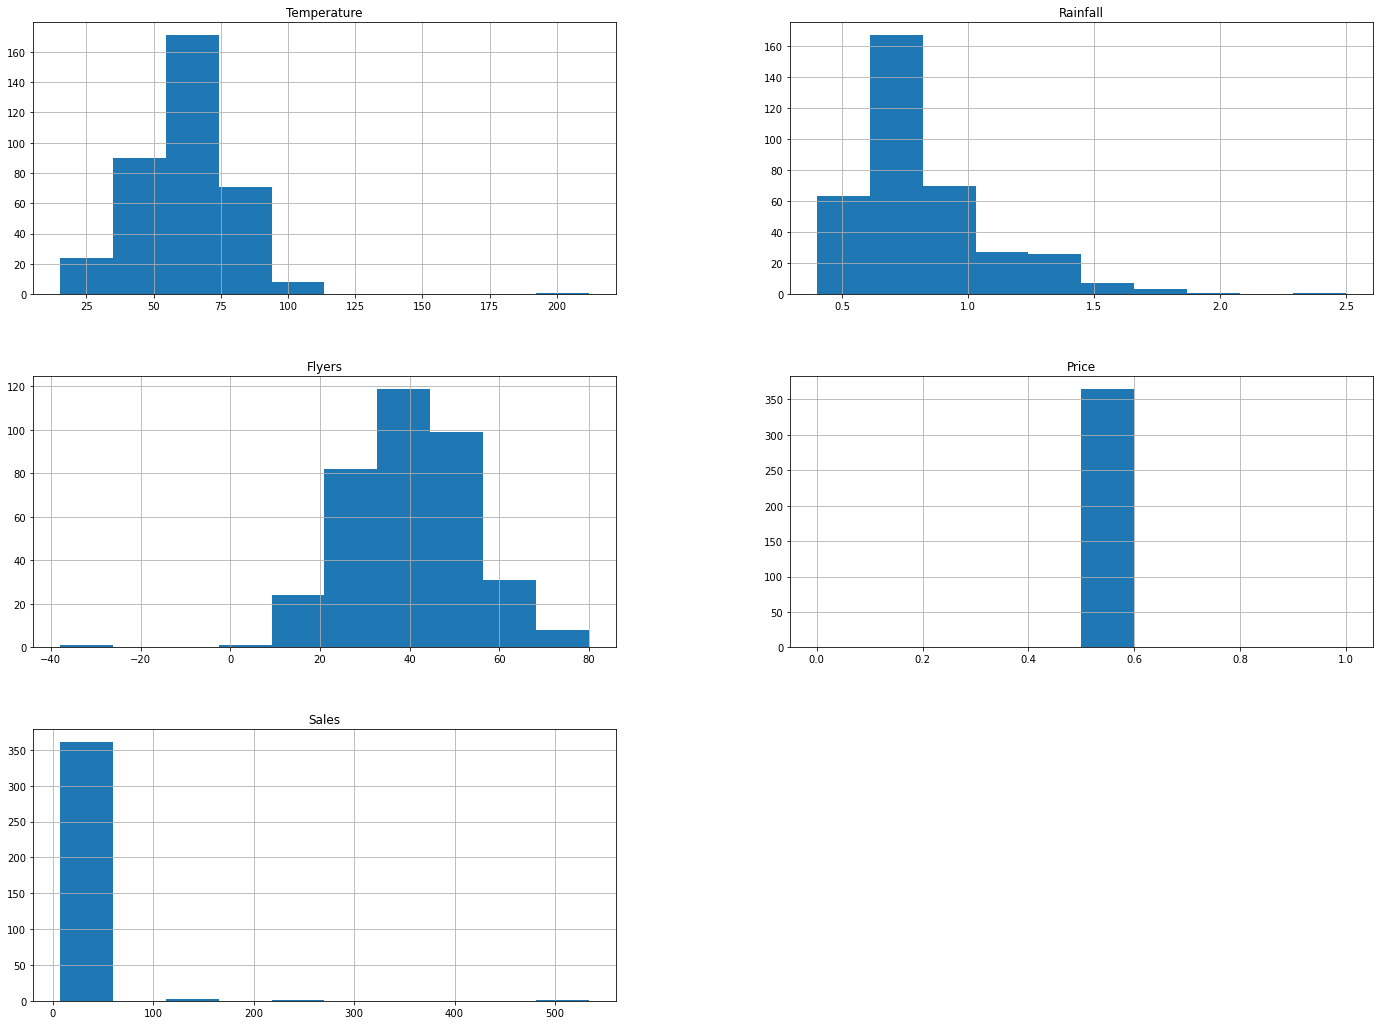

In [8]:
df.hist(figsize=(24, 18))
plt.show()

In [9]:
Temperature = df.Temperature
Rainfall = df.Rainfall
Flyers = df.Flyers
Price = df.Price
Sales = df.Sales

# Calculate the z-score 
zscores = pd.Series((Temperature - Temperature.mean()) / Temperature.std())

# Finds all of the observations two standard deviations or more.
Temperature[zscores.abs() >= 2]

# Finds all of the observations three standard deviations or more
Temperature[zscores.abs() >= 3]


41    212.0
Name: Temperature, dtype: float64

- Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense? Which outliers should be kept?

In [10]:
upper_temp, lower_temp = get_lower_and_upper_bounds(Temperature)
upper_rain, lower_rain = get_lower_and_upper_bounds(Rainfall)
upper_fly, lower_fly = get_lower_and_upper_bounds(Flyers)
upper_price, lower_price = get_lower_and_upper_bounds(Price)
upper_sales, lower_sales = get_lower_and_upper_bounds(Sales)

Temperature's Upper bound is 104.7, and Lower bound is 16.7
Rainfall's Upper bound is 1.3, and Lower bound is 0.3
Flyers's Upper bound is 76.0, and Lower bound is 4.0
Price's Upper bound is 0.5, and Lower bound is 0.5
Sales's Upper bound is 45.0, and Lower bound is 5.0


(array([ 24.,  90., 171.,  71.,   8.,   0.,   0.,   0.,   0.,   1.]),
 array([ 15.1 ,  34.79,  54.48,  74.17,  93.86, 113.55, 133.24, 152.93,
        172.62, 192.31, 212.  ]),
 <BarContainer object of 10 artists>)

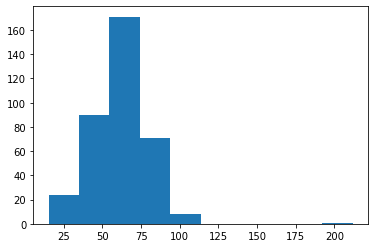

In [11]:
plt.hist(Temperature)

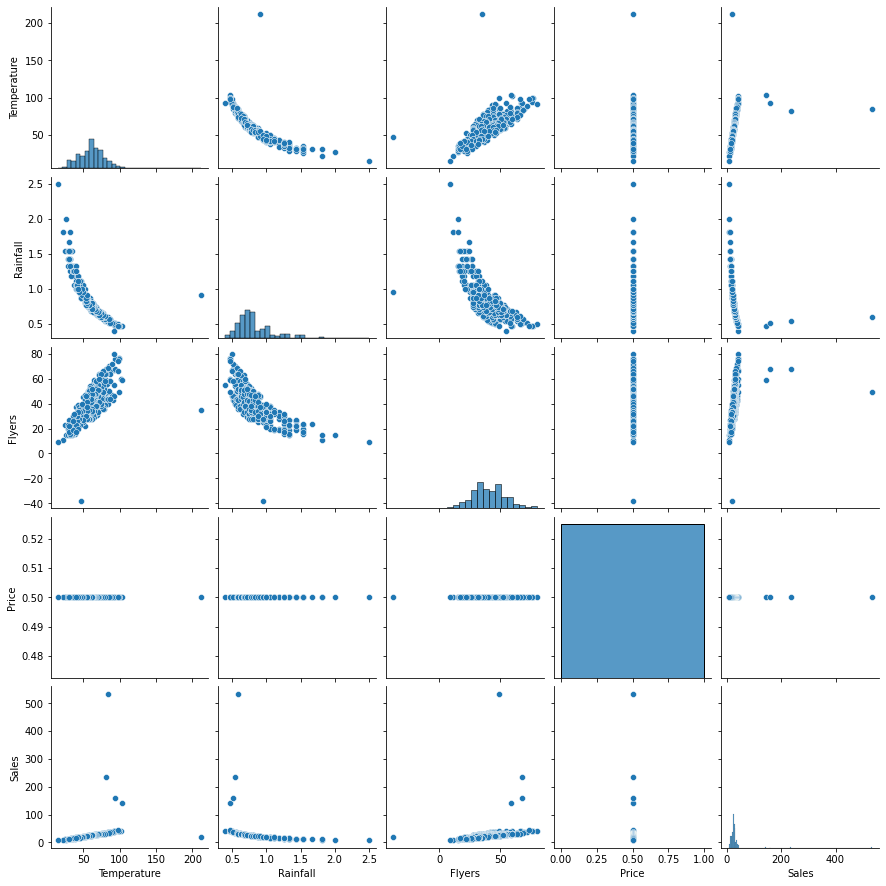

In [12]:
sns.pairplot(df)

In [13]:
low_outliers = Temperature[Temperature < lower_temp]
low_outliers

364    15.1
Name: Temperature, dtype: float64

In [14]:
hi_outliers = Temperature[Temperature > upper_temp]
hi_outliers

41    212.0
Name: Temperature, dtype: float64

In [15]:
low_outliers = Rainfall[Rainfall < lower_temp]
low_outliers

0      2.00
1      1.33
2      1.33
3      1.05
4      1.00
5      1.54
6      1.54
7      1.18
8      1.18
9      1.05
10     1.54
11     1.33
12     1.33
13     1.05
14     1.11
15     1.67
16     1.43
17     1.18
18     1.18
19     1.43
20     1.25
21     1.11
22     1.05
23     1.54
24     1.25
25     1.25
26     1.05
27     1.33
28     1.33
29     1.05
30     1.05
31     1.00
32     1.00
33     0.87
34     0.83
35     1.11
36     0.95
37     0.87
38     0.87
39     1.00
40     0.91
41     0.91
42     0.83
43     1.11
44     0.95
45     0.91
46     0.87
47     1.00
48     0.95
49     0.95
50     0.95
51     1.00
52     0.95
53     1.00
54     0.87
55     1.00
56     1.05
57     1.00
58     0.91
59     0.87
60     0.80
61     0.77
62     0.77
63     0.87
64     0.77
65     0.77
66     0.77
67     0.80
68     0.83
69     0.83
70     0.74
71     0.87
72     0.87
73     0.83
74     0.83
75     0.77
76     0.83
77     0.83
78     0.77
79     0.83
80     0.74
81     0.87
82     0.83
83  

In [16]:
hi_outliers = Rainfall[Rainfall > upper_temp]
hi_outliers

Series([], Name: Rainfall, dtype: float64)

In [17]:
low_outliers = Flyers[Flyers < lower_temp]
low_outliers

0      15
1      15
11     16
20     16
27     15
324   -38
337    16
338    11
343    15
350    16
364     9
Name: Flyers, dtype: int64

In [18]:
hi_outliers = Flyers[Flyers > upper_temp]
hi_outliers

Series([], Name: Flyers, dtype: int64)

In [19]:
low_outliers = Price[Price < lower_temp]
low_outliers

0      0.5
1      0.5
2      0.5
3      0.5
4      0.5
5      0.5
6      0.5
7      0.5
8      0.5
9      0.5
10     0.5
11     0.5
12     0.5
13     0.5
14     0.5
15     0.5
16     0.5
17     0.5
18     0.5
19     0.5
20     0.5
21     0.5
22     0.5
23     0.5
24     0.5
25     0.5
26     0.5
27     0.5
28     0.5
29     0.5
30     0.5
31     0.5
32     0.5
33     0.5
34     0.5
35     0.5
36     0.5
37     0.5
38     0.5
39     0.5
40     0.5
41     0.5
42     0.5
43     0.5
44     0.5
45     0.5
46     0.5
47     0.5
48     0.5
49     0.5
50     0.5
51     0.5
52     0.5
53     0.5
54     0.5
55     0.5
56     0.5
57     0.5
58     0.5
59     0.5
60     0.5
61     0.5
62     0.5
63     0.5
64     0.5
65     0.5
66     0.5
67     0.5
68     0.5
69     0.5
70     0.5
71     0.5
72     0.5
73     0.5
74     0.5
75     0.5
76     0.5
77     0.5
78     0.5
79     0.5
80     0.5
81     0.5
82     0.5
83     0.5
84     0.5
85     0.5
86     0.5
87     0.5
88     0.5
89     0.5
90     0.5

In [20]:
hi_outliers = Price[Price > upper_temp]
hi_outliers

Series([], Name: Price, dtype: float64)

In [21]:
low_outliers = Sales[Sales < lower_temp]
low_outliers

0      10
1      13
2      15
5      11
6      13
7      15
10     12
11     14
12     15
15     12
16     14
17     16
19     12
20     14
21     16
23     12
24     14
25     16
27     13
28     14
336    15
337    13
338    10
341    15
342    14
343    11
345    15
346    14
347    13
349    15
350    14
351    13
353    16
354    15
355    13
357    16
358    15
359    13
361    16
362    15
363    13
364     7
Name: Sales, dtype: int64

In [22]:
hi_outliers = Sales[Sales > upper_temp]
hi_outliers

181    143
182    158
183    235
184    534
Name: Sales, dtype: int64

2. Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:

- Use a 2 sigma decision rule to isolate the outliers.

- Do these make sense?
- Should certain outliers be kept or removed?

In [23]:
Temperature.sort_values(ascending=False)

41     212.0
181    102.9
176    102.6
202     99.6
198     99.3
166     99.3
190     98.0
207     97.9
171     94.3
182     93.4
185     93.0
162     93.0
194     92.0
186     91.7
158     90.7
154     90.4
180     89.4
203     89.1
208     87.4
157     86.8
169     86.5
179     86.5
200     86.5
209     85.5
170     85.1
175     85.1
165     84.8
161     84.8
184     84.2
156     84.2
199     83.8
204     83.5
191     83.5
188     83.2
195     82.5
187     82.5
183     81.5
153     81.5
197     80.9
164     80.5
174     80.5
192     80.2
205     79.9
173     79.9
152     79.9
230     79.6
160     79.5
196     79.2
193     78.9
155     78.6
210     78.2
189     77.9
159     77.6
239     77.6
133     77.3
217     77.3
150     77.3
146     77.3
201     76.9
206     76.6
216     76.6
220     76.6
167     76.3
213     76.3
142     76.3
178     75.9
212     75.6
163     75.6
177     75.3
138     75.3
214     75.0
127     75.0
218     75.0
222     75.0
149     75.0
240     75.0
235     74.6

3. Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from lemonade.csv

In [ ]:
columns = [Temperature, Rainfall, Flyers, Price, Sales]

Date


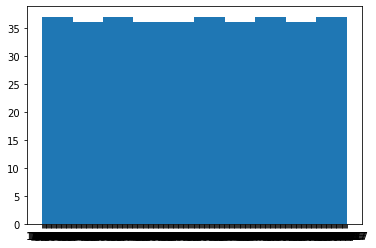

Day


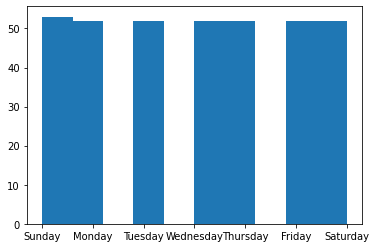

Temperature


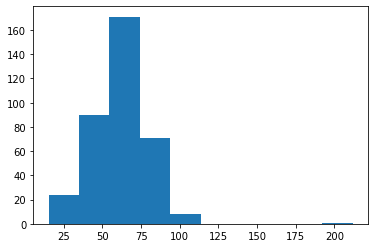

Rainfall


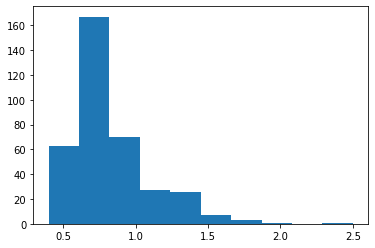

Flyers


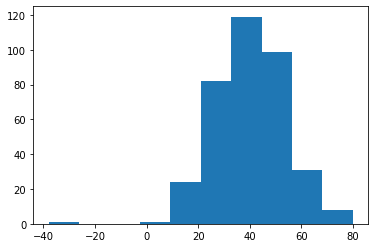

Price


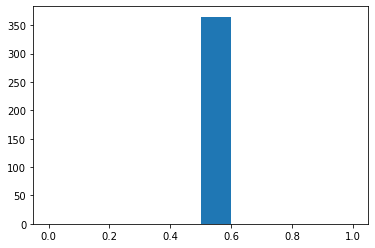

Sales


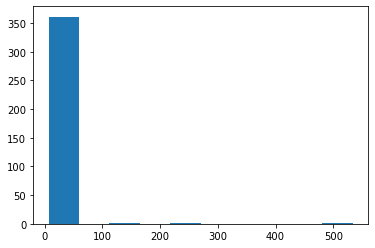

In [25]:
for col in df.columns:
    print(col)
    plt.hist(df[col])
    plt.show()

In [26]:
# for col in df.columns:
#     if np.issubdtype(df[col].dtype, np.number):
upper_temp, lower_temp = get_lower_and_upper_bounds(Temperature, 3)
upper_rain, lower_rain = get_lower_and_upper_bounds(Rainfall, 3)
upper_fly, lower_fly = get_lower_and_upper_bounds(Flyers, 3)
upper_price, lower_price = get_lower_and_upper_bounds(Price, 3)
upper_sales, lower_sales = get_lower_and_upper_bounds(Sales, 3)

Temperature's Upper bound is 137.7, and Lower bound is -16.3
Rainfall's Upper bound is 1.7, and Lower bound is -0.1
Flyers's Upper bound is 103.0, and Lower bound is -23.0
Price's Upper bound is 0.5, and Lower bound is 0.5
Sales's Upper bound is 60.0, and Lower bound is -10.0
